In [7]:
%pylab inline
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


A Neural Network in 11 lines of Python
======================================

From http://iamtrask.github.io/2015/07/12/basic-python-network/

Simple 2 Layers NN
----------------

Output After Training:
[[ 0.00966449]
 [ 0.00786506]
 [ 0.99358898]
 [ 0.99211957]]


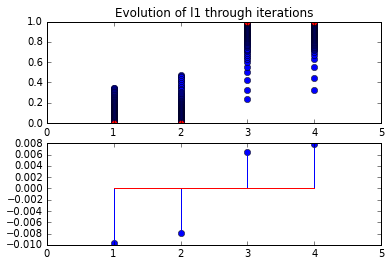

In [2]:
import numpy as np

# sigmoid function
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))
    
# input dataset
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])
    
# output dataset            
y = np.array([[0,0,1,1]]).T

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,1)) - 1

plt.subplot(211)

for iter in range(10000):

    # forward propagation
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))

    # how much did we miss?
    l1_error = y - l1

    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    l1_delta = l1_error * nonlin(l1,True)

    # update weights
    syn0 += np.dot(l0.T,l1_delta)
    
    plt.plot(range(1,5), l1, 'ob')
    plt.hold(True)


print("Output After Training:")
print(l1)

plt.plot(range(1,5), y, 'or')
plt.xlim([0, 5])
plt.title("Evolution of l1 through iterations")
plt.subplot(212)
plt.stem(range(1,5), y-l1)
plt.xlim([0,5])
plt.show()



It works pretty well, let's now see how this simple implementation converges with respect to the number of iterations for the training.


OO implementation
---------------

In [3]:
class TwoLayersNN:
    
    def __init__(self, in_data, out_data):
        
        self.in_data = in_data
        self.out_data = out_data
        
        self._init_synapses()
        
    def _init_synapses(self):
        
        self.syn0 = 2*np.random.random((len(self.in_data[0]), len(self.out_data[0]))) - 1
        self.trained = False
        
        
    def NL(self, x, deriv=False):
        
        if(deriv==True):
            return x*(1-x)
        return 1/(1+np.exp(-x))
                
    def train(self, iter_nb=10000):
        
        if self.trained:
            self._init_synapses()
        
        for iter in range(iter_nb):
            
            l0 = self.in_data
            l1 = self.NL(np.dot(l0, self.syn0))
            
            l1_error = self.out_data - l1
            l1_delta = l1_error*self.NL(l1, True)
            
            self.syn0 += np.dot(l0.T, l1_delta)
            
        self.trained = True
        return self.syn0
            
    def test(self, in_data, batch=True):
        
        if not batch:
            in_data = [in_data]
            
        return self.NL(np.dot(in_data, self.syn0))

Convergence Study
---------------

In [4]:
import numpy as np

np.random.seed(1)

# input dataset
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])
    
# output dataset            
y = np.array([[0,0,1,1]]).T

iterations_numbers = list(range(1, 20000, 200))
results = []


NN = TwoLayersNN(X, y)

for it in iterations_numbers:
    print('Training on {} iterations'.format(it))
    NN.train(it)
    guesses = NN.test(X)
    results.append(np.mean(np.power(np.abs(y - guesses), 2)))
    

Training on 1 iterations
Training on 201 iterations
Training on 401 iterations
Training on 601 iterations
Training on 801 iterations
Training on 1001 iterations
Training on 1201 iterations
Training on 1401 iterations
Training on 1601 iterations
Training on 1801 iterations
Training on 2001 iterations
Training on 2201 iterations
Training on 2401 iterations
Training on 2601 iterations
Training on 2801 iterations
Training on 3001 iterations
Training on 3201 iterations
Training on 3401 iterations
Training on 3601 iterations
Training on 3801 iterations
Training on 4001 iterations
Training on 4201 iterations
Training on 4401 iterations
Training on 4601 iterations
Training on 4801 iterations
Training on 5001 iterations
Training on 5201 iterations
Training on 5401 iterations
Training on 5601 iterations
Training on 5801 iterations
Training on 6001 iterations
Training on 6201 iterations
Training on 6401 iterations
Training on 6601 iterations
Training on 6801 iterations
Training on 7001 iterations

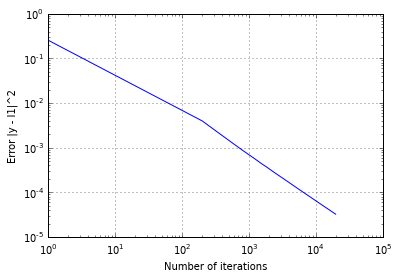

In [5]:
plt.loglog(iterations_numbers, results)
plt.xlabel('Number of iterations')
plt.ylabel('Error |y - l1|^2')
plt.grid(True)
plt.show()

### So what ?

There's clearly 2 zones on the convergence diagram. An **interesting track** could be to **figure out why**.

Another track leads to an analysis of the position of the bend : does it move ? Is it stable with respect to iterations ? to error order of magnitude ?

Finnaly, it's possible to train a network and stop when overall $\mathbb{L}_2$ error is below a *goal error*.


## Stability of the slope singular point

To be tested on different re-trained NN but also on a single n-times re-trained NN.

In [6]:
# Let's re-use the above show code into a function
# so one can re-run the same experiment multiple times


def slope_singularity_exp(iterations_numbers, NN=None):
    """
    Re-train the same NN for different numbers of training iterations.
    Store and return the mean L2 distance between guesses and expected output
    
    If a NN instance is passed as a parameter, this network will be used 
    instead of creating a new one.
    """

    if not NN:
        NN = TwoLayersNN(X, y)

    results = []
    for it in iterations_numbers:
        NN.train(it)
        guesses = NN.test(X)
        results.append(np.mean(np.power(np.abs(y - guesses), 2)))

    return results

###  Different NN

In [7]:
iterations_numbers = list(range(1, 20000, 250))

global_results = []

for i in range(5):
    print("Running experiment no.{}".format(i))
    global_results.append(slope_singularity_exp(iterations_numbers))
    

Running experiment no.0
Running experiment no.1
Running experiment no.2
Running experiment no.3
Running experiment no.4


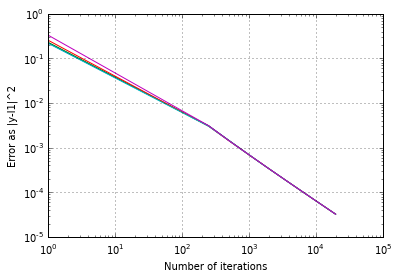

In [8]:
plt.figure()
plt.hold(True)
for res in global_results:
    plt.loglog(iterations_numbers, res)

plt.grid(True)
plt.xlabel("Number of iterations")
plt.ylabel("Error as |y-l1|^2")
plt.show()

It seems that different NN of the same type exhibit a bend at the same point. What's interesting at this point is that we now can infer the explanation for this bend point can be found in the underlying maths.

At low numbers of training iterations, the results are slightly dispersed. This issue may be unseen using only one single NN.

###  Single NN

In [9]:
NN = TwoLayersNN(X,y)
iterations_numbers = list(range(1, 20000, 250))

global_results = []

for i in range(5):
    print("Running experiment no.{}".format(i))
    global_results.append(slope_singularity_exp(iterations_numbers, NN))
    

Running experiment no.0
Running experiment no.1
Running experiment no.2
Running experiment no.3
Running experiment no.4


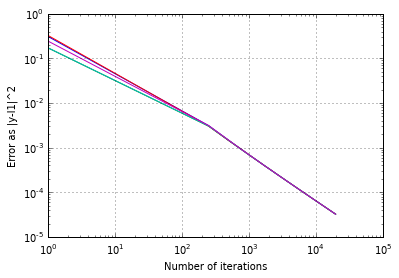

In [10]:
plt.figure()
plt.hold(True)
for res in global_results:
    plt.loglog(iterations_numbers, res)

plt.grid(True)
plt.xlabel("Number of iterations")
plt.ylabel("Error as |y-l1|^2")
plt.show()

The hypothesis that using a single NN instead of one per run  would reduce dispersion at low training iterations numbers isn't verified. The second (and better) hypothesis is that this dispersion is only related to the random initialization of synapses... it seems plausible but the deviation is quite big though....

To answer the questions above : the bend point seems stable with respect to number of iterations and error, no matter if we use one or several NN. $\Leftarrow$ **Answer lies in maths**

The second goal was to implement an error controled training process : let's modify the TwoLayersNN class.

In [56]:
class TwoLayersNN:
    
    def __init__(self, in_data, out_data):
        
        self.in_data = in_data
        self.out_data = out_data
        
        self._init_synapses()
        
    def _init_synapses(self):
        
        self.syn0 = 2*np.random.random((len(self.in_data[0]), len(self.out_data[0]))) - 1
        self.trained = False
        
        
    def NL(self, x, deriv=False):
        
        if(deriv==True):
            return x*(1-x)
        return 1/(1+np.exp(-x))
                
    def train(self, condition=lambda _: False, verbose=False):
                    
        if self.trained:
            self._init_synapses()
        
        self.training_iter = 0
        while condition(self):
            if verbose: print('Counter : {}'.format(self.training_iter))
            l0 = self.in_data
            l1 = self.NL(np.dot(l0, self.syn0))
            
            l1_error = self.out_data - l1
            l1_delta = l1_error*self.NL(l1, True)
            
            self.syn0 += np.dot(l0.T, l1_delta)
            
            self.training_iter += 1
            
        self.trained = True
        return self.syn0
    
    def train_iter(self, iter_nb):
        self.train(lambda x: x.training_iter < iter_nb)
        
    def train_error(self, goal_error, *a, **kw):
        self.train(lambda s: (s.training_iter < 10000) or (np.mean(np.power(np.abs(self.out_data- s.test(self.in_data)), 2)) > goal_error), *a, **kw)
    
    def test(self, in_data, batch=True):
        
        if not batch:
            in_data = [in_data]
            
        return self.NL(np.dot(in_data, self.syn0))

In [19]:
NN = TwoLayersNN(X,y)
NN.train_error(1e-5)
mean_error = np.mean(np.power(np.abs(y- NN.test(X)), 2))

print('Mean error : {}'.format(mean_error))

KeyboardInterrupt: 

3 Layers NN
----------

In [20]:
import numpy as np

def nonlin(x,deriv=False):
	if(deriv==True):
	    return x*(1-x)
	return 1/(1+np.exp(-x))
    
X = np.array([
    [0,0,1],
    [0,1,1],
    [1,0,1],
    [1,1,1]
])
                
y = np.array([
    [0],
	[1],
	[1],
	[0]
])

np.random.seed(1)

# randomly initialize our weights with mean 0
syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1

for j in range(60000):

	# Feed forward through layers 0, 1, and 2
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))

    # how much did we miss the target value?
    l2_error = y - l2
    
    if (j% 10000) == 0:
        print("Error:" + str(np.mean(np.abs(l2_error))))
        
    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    l2_delta = l2_error*nonlin(l2,deriv=True)

    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = l2_delta.dot(syn1.T)
    
    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    l1_delta = l1_error * nonlin(l1,deriv=True)

    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)



Error:0.496410031903
Error:0.00858452565325
Error:0.00578945986251
Error:0.00462917677677
Error:0.00395876528027
Error:0.00351012256786


## OO Implementation


In [48]:
import numpy as np

class DeepNetwork:
    """
    Simple implementation of configurable DNN.
    Number of layers and training data can be specified.

    Layers must be specified using a list-based approach :

        layers = [
            nb of neurons on first layer (in),
            nb of neurons on second layer,
            # ...
            nb of neurons on last layer (out)
        ]

        Synapses will be created accordingly.

    """
    # TODO Allow modification of synapses to reflect network goal development

    def __init__(self, lsizes, in_data, out_data):

        self.in_data = in_data
        self.out_data = out_data

        self.lsizes = lsizes
        self.lnb = len(self.lsizes)

        self._init_synapses()

    def _init_synapses(self):
        self.synapses = []
        for l in range(1,self.lnb):
            self.synapses.append(
                2*np.random.random((self.lsizes[l-1], self.lsizes[l]))-1
            )

        self.trained = False


    def NL(self, x, deriv=False):

        if(deriv==True):
            return x*(1-x)
        return 1/(1+np.exp(-x))

    def train(self, condition=lambda _: False, verbose=False):

        if self.trained:
            self._init_synapses()

        self.training_iter = 0

        L = [[] for i in self.lsizes]
        while condition(self):
            if verbose: print('Counter : {}'.format(self.training_iter))
                
            # forward propagation
            L[0] = self.in_data
            for i in range(1,self.lnb):
                L[i] = self.NL(np.dot(L[i-1], self.synapses[i-1]))

            if self.lnb==2:
                l1_error = self.out_data - L[1]
                l1_delta = l1_error*self.NL(L[1], True)
            
                self.synapses[0] += np.dot(L[0].T, l1_delta)
            
            else:
                
                # backpropagation & synapses regression
                L_err = [0 for i in range(self.lnb)]
                L_delta = [0 for i in range(self.lnb)]

                # initialize recur relation on the last element
                L_err[-1] = self.out_data - L[-1]
                L_delta[-1] = L_err[-1]*self.NL(L[-1], True)
            
                # element-wise backpropagation
                for i in reversed(range(self.lnb-1)):
                    L_err[i] = np.dot(L_delta[i+1], self.synapses[i].T)
                    L_delta[i] = L_err[i]*self.NL(L[i], True)
                    self.synapses[i] += np.dot(L[i].T, L_delta[i+1])

            self.training_iter += 1

        self.trained = True
        return self.synapses

    def train_iter(self, iter_nb):
        return self.train(lambda x: x.training_iter < iter_nb)

    def train_error(self, goal_error, *a, **kw):
        self.train(lambda s: (s.training_iter < 10000) or (np.mean(np.power(np.abs(self.out_data- s.test(self.in_data)), 2)) > goal_error), *a, **kw)

    def test(self, in_data, batch=True):
        if not batch:
            in_data = [in_data]

        L = [[] for i in self.lsizes]
        L[0] = self.in_data
        for i in range(1,self.lnb):
            L[i] = self.NL(np.dot(L[i-1], self.synapses[i-1]))
            
        return L[-1]


In [59]:
import numpy as np
np.random.seed(1)
#from DNN import DeepNetwork
    
X = np.array([
    [0,0,1],
    [0,1,1],
    [1,0,1],
    [1,1,1]
])
                
y = np.array([
    [0],
	[1],
	[1],
	[0]
])

NN = DeepNetwork([3,1], X, y)
NN.train_iter(10000)
print(' '.join(map(str, NN.test(X))))

NN2 = TwoLayersNN(X,y)
NN2.train_iter(10000)
print(' '.join(map(str, NN2.test(X))))

[ 0.5] [ 0.5] [ 0.5] [ 0.5]
[ 0.5] [ 0.5] [ 0.5] [ 0.5]


### Experiments

The goal is now to exhibt convergence properties of Deep Neural Network.

To reach this goal, it is proposed to compare convergence diagrams for $n$-layers NN ($2 \leq n \leq 5$) in different configurations :

- first, on the same training dataset, we study the influence of the number 
of layers (first and last layers are of equal size for all networks on benchmark, hidden layers are of size $\max(s_{first}, s_{last}) +1$ where $s_i$ is the size (number of neurons) of the layer $i$
- second we run the same experiements as for the 2 layers NN but on differently sized networks

### other ideas

- adaptability : change the training set and see how much it takes for the NN to change the weight
- placticity : remove one or more neurons on hidden layers and see how the results are impacted



In [50]:
iterations_numbers = list(range(1, 20000, 500))
results = [[] for _ in range(2,6)]
NN_list = [DeepNetwork(_, X, y) for _ in [[3,1], [3,4,1], [3,4,4,1], [3,4,4,4,1]]]
listlen = len(NN_list)

for it in iterations_numbers:
    print('Training on {} iterations : '.format(it), end='')
    for i in range(listlen):
        print('{}... '.format(i), end='')
        NN_list[i].train_iter(it)
        guesses = NN_list[i].test(X)
        results[i].append(np.mean(np.power(np.abs(y - guesses), 2)))
    print('')
    

Training on 1 iterations : 0... 1... 2... 3... 
Training on 501 iterations : 0... 1... 2... 3... 
Training on 1001 iterations : 0... 1... 2... 3... 
Training on 1501 iterations : 0... 1... 2... 3... 
Training on 2001 iterations : 0... 1... 2... 3... 
Training on 2501 iterations : 0... 1... 2... 3... 
Training on 3001 iterations : 0... 1... 2... 3... 
Training on 3501 iterations : 0... 1... 2... 3... 
Training on 4001 iterations : 0... 1... 2... 3... 
Training on 4501 iterations : 0... 1... 2... 3... 
Training on 5001 iterations : 0... 1... 2... 3... 
Training on 5501 iterations : 0... 1... 2... 3... 
Training on 6001 iterations : 0... 1... 2... 3... 
Training on 6501 iterations : 0... 1... 2... 3... 
Training on 7001 iterations : 0... 1... 2... 3... 
Training on 7501 iterations : 0... 1... 2... 3... 
Training on 8001 iterations : 0... 1... 2... 3... 
Training on 8501 iterations : 0... 1... 2... 3... 
Training on 9001 iterations : 0... 1... 2... 3... 
Training on 9501 iterations : 0... 

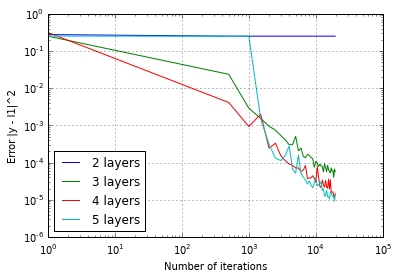

In [51]:
plt.figure()
plt.hold(True)
for i in range(listlen):
    plt.loglog(iterations_numbers, results[i])
    
plt.xlabel('Number of iterations')
plt.ylabel('Error |y - l1|^2')
plt.grid(True)
plt.legend(["{} layers".format(NN_list[_].lnb) for _ in range(listlen)], loc='lower left')
plt.show()